# Lab 3 - Intro to Regression - Modeling COVID19

The goals of this lab are to: 

- Examine and practice using linear regression for predictions  
- Describe gradient descent
- Use learning curves to visualize and diagnose how well a machine learning algorthm is working. 
- Using polynomial regression to model COVID19
- Discuss the systematic uncetainties arising from machine learning models. 

Authors: Bernie Boscoe & Tuan Do

Last Update: Tuan Do

## Question 0 
(3 pts)

<font color= red>Put the number you get from the mid-quarter class survey in the cell below</font>

6563

# Linear Regression

Linear regression- one of the simplest models. For this section, we'll be leaning on HOML Chapter 4, because it has a lot of good material, in particular, the two differing ways to train a lin reg model:  
1. "Closed form" equation that directly computes the model parameters that best fit the model to the training set (minimizing the cost function)  
2. Using an iterative optimization approach called Gradient Descent that minimizes the cost function over the training set, converging to the same parameters as the first method. (This might be new to you.)  
Linear Regression model prediction is commonly written as:

$\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}+ \ldots + \theta_{n}x_{n}$  
$\hat{y}$ is the predicted value  
$n$ is the number of features  
$x_{i}$ is the $i^{th}$ feature value  
$\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0})$  
the feature weights $\theta_{1},\theta_{2}, \ldots , \theta_{n}$.  

The vectorized form is as follows:

$\hat{y} = h_{\theta}(x) = \boldsymbol{\theta} \cdot x$  
Where $\theta$ is the model's parameter vector, containing the bias term $\theta_{0}$   
the feature weights $\theta_{1}$ to $\theta_{n}$  
$\boldsymbol{x}$ is the instance's feature vector, containing $x_{0}$ to $x_{n}$  
with $x_{0}$ always equal to 1    
$\boldsymbol{\theta \cdot x}$ is the dot product of the vectors  
$\boldsymbol{\theta}$ and $\boldsymbol{x}$   
$h_{\theta}$ is the hypothesis function, using the model parameters $\boldsymbol{\theta}$.  

Important: vectors are often represented as column vectors, so if $\boldsymbol{\theta}$ and $\boldsymbol{x}$ are column vectors then the prediction is $\hat{y} = \boldsymbol{\theta^{T}x}$, where $\boldsymbol{\theta^{T}x}$ is the matrix multiplication of the two.  

We need to find the value of $\boldsymbol{\theta}$ that minimizes our error.

$$MSE(\boldsymbol{X},h_{\theta})= \frac 1m\sum_{i=1}^m(\boldsymbol{\theta^{T}x^{(i)}} -y^{(i)})^2$$


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems. There are many, and these are given to you as the most simple versions (note they are in slightly different notation common in machine learning):

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **cost functions**, because we want to minimize them. Important- there is confusion as to the difference between the cost function and loss function. Generally, the loss function is a single instance of a cost function, and the cost function is the average over the parameters. But you will see abuse of these definitions for sure in the ML space with cost and loss being interchangable. Just make sure you define what function you use in your research!

For a warm-up, let's first find the value of $\theta$ that minimizes the MSE cost function using the closed-form solution called the least squares equation:  
$$\boldsymbol{\hat{\theta} = (X^{T}X)^{-1}X^{T}y}$$  
where capital X is the entire training set (so, a matrix of vectors of x's, or instances).
Using this formula we do not use gradient descent. See https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/#:~:text=Normal%20Equation%20is%20an%20analytical,a%20dataset%20with%20small%20features for an explanation of how the MSE cost function from above is transformed into matrix notation.

From a mathematical perspective, you might see that to use the least squares equation you would need to compute an inverse and sometimes that is impossible. Another consideration in optimization and regression problems is computational complexity, which affects computing speed, and so on. Scikit-learn's LinearRegression class uses SVD (Singular Value Decomposition) that decomposes the training set X in a way that is more efficient than computing the normal equation- which gets us to an important conversation to have: When using tools such as scikit-learn, how much do you need to know about the actual mathematics built into the class? Generally speaking, a machine learning practicioner in say, finance, might not care about what is under the hood and instead cares about speed and accuracy and not the math that gets them there. In the case of a researcher in the physical sciences, it is likely a different case what metrics the researcher cares about! Now we go to a simple introduction of these concepts.
Let's import:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
import pandas as pd
import seaborn as sns # reminder: you may use any plotting tool you like!
%matplotlib inline

In [2]:
# Warmup. let's generate some random linearish data.
X = 3* np.random.rand(100,1)
y = 2 + 2*X + np.random.randn(100,1)


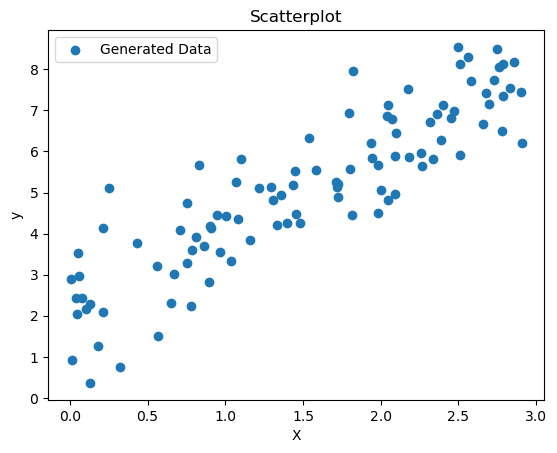

In [3]:
plt.scatter(X,y,label='Generated Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatterplot')
plt.legend(loc='upper left')
plt.show()

## Question 1
(6 pts)

<font color= red>1. Using the normal equation and numpy, compute $\hat{\theta}$  
    2. plot your regression line.  
    3. Use the sklearn LinearRegression model, repeat and fit line.</font>
    

[[2.14873226]
 [1.93861989]]


Text(0.5, 1.0, 'Real v/s Predicted Values')

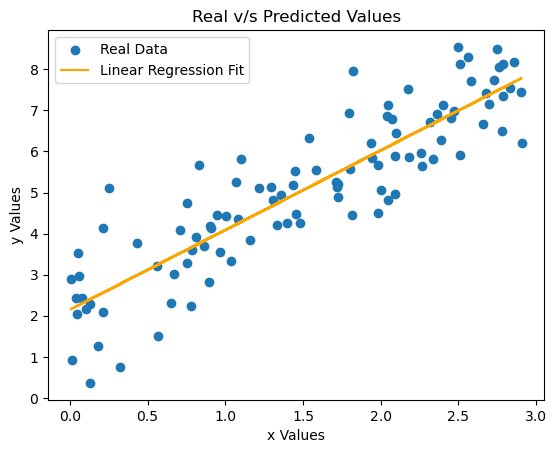

In [4]:
from sklearn.linear_model import LinearRegression

# 1. Compute theta hat
def line_regr_normal_equation(X, y):
    XT = np.transpose(X)
    XT_X = np.dot(XT, X)
    XT_y = np.dot(XT, y)
     
    try:
        theta = np.linalg.solve(XT_X, XT_y)
        return theta
    except np.linalg.LinAlgError:
        return None
 
 
# Add a column of ones to X for the intercept term
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
 
theta = line_regr_normal_equation(X_with_intercept, y)
if theta is not None:
    print(theta)

reg_vals = []
for i in range(len(X)):
    reg_vals = np.append(reg_vals, theta[0]+(theta[1])*X[i])

# 2. Plotting the regression line
plt.scatter(X, y, label = 'Real Data')
plt.plot(X, reg_vals, color='orange', label = 'Linear Regression Fit')
plt.legend(loc='upper left')
plt.xlabel('x Values')
plt.ylabel('y Values')
plt.title('Real v/s Predicted Values')

Text(0.5, 1.0, 'Real v/s Predicted Values')

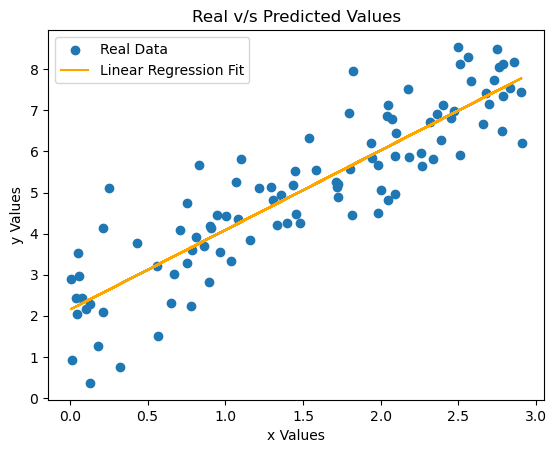

In [5]:
# 3. Fit line using sklearn LinearRegression model
regr = LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

plt.scatter(X, y, label = 'Real Data')
plt.plot(X, y_pred, color='orange', label = 'Linear Regression Fit')
plt.legend(loc='upper left')
plt.xlabel('x Values')
plt.ylabel('y Values')
plt.title('Real v/s Predicted Values')

## Question 2
(8 pts)

Next we are going to use the "machine learning way."  
<font color='red'>1. Using the same datasets X and y,import sklearn train_test_split and split X,y    
 into X_train, X_test, y_train, y_test with a test_size of 0.3 and random_state = 42  .  
2. Train/Fit model to training set  
3. Create predictions from X_test  
             4. Create a scatterplot of the real test values versus the predicted values. </font>
             

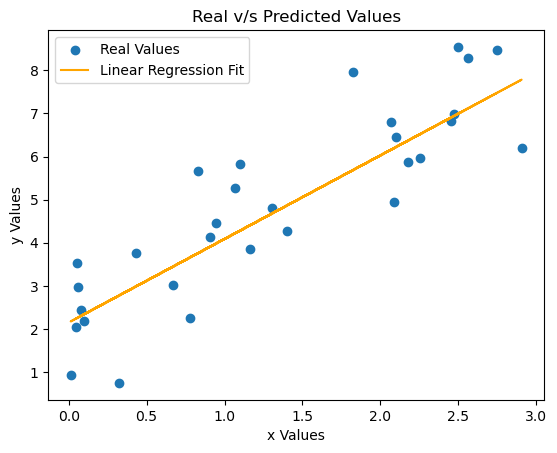

In [6]:
from sklearn.model_selection import train_test_split

# 1. Split da data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# 2. Fit model to training set
regr_train = LinearRegression()
regr_train.fit(X_train, y_train)

# 3. Create predictions from X_test
y_pred = regr.predict(X_test)

# 4. Create scatterplot
plt.scatter(X_test, y_test, label = 'Real Values')
plt.plot(X_test, y_pred, label = 'Linear Regression Fit', color ='orange')
plt.legend(loc='upper left')
plt.xlabel('x Values')
plt.ylabel('y Values')
plt.title('Real v/s Predicted Values')
plt.show()

## Question 3
(4 pts)

<font color ='red'>1. Calculate the Mean Absolute Error, the Mean Squared Error, and the Root Mean Squared Error.  
    2. Next, You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().</font>

MAE: 0.8581764495573042
MSE: 1.1254974269552955
RMSE: 1.0608946351807496


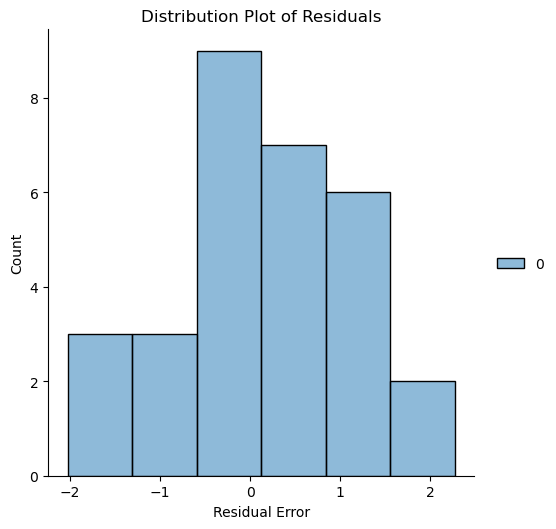

In [7]:
from sklearn import metrics

# 1. Calculate MAE, MSE, RMSE
n = len(X_test)

# 1a. MAE
abs_diff = 0
for i in range(len(y_pred)):
    abs_diff = np.abs(y_test-y_pred)
mae = (1/n)*np.sum(abs_diff)
print("MAE:", mae)

# 1b. MSE
sqrd_diff = 0
for i in range(len(y_pred)):
    sqrd_diff = np.square(y_test-y_pred)
mse = (1/n)*np.sum(sqrd_diff)
print("MSE:", mse)

# 1c. RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# 2. Plot residuals
ax = sns.displot(y_test-y_pred)
ax.set(xlabel='Residual Error',
       ylabel='Count',
       title='Distribution Plot of Residuals')
plt.show()

# Gradient Descent
For now, sticking with our toy dataset, we will optimize with Gradient Descent. You wouldn't ordinarily use gradient descent with linear regression because you can just solve directly with the closed form least squares equation. (For example you might ask: Is there an analytical (closed-form) solution to Logistic Regression similar to the Normal Equation for Linear Regression? Unfortunately, there is no closed-form solution for maximizing the log-likelihood (or minimizing the inverse, the logistic cost function); at least it has not been found, yet).  
But, for demonstration purposes we will use gradient descent on a linear regression example. In this way, using gradient descent which is iterative, we can tweak various hyperparameters to minimize a cost function. Hyperparameters include the size of the steps taken to find the minimum, called the learning rate. If the learning rate is too small, the algorithm will have to iterate many times before converging, which is slow. Conversely, if the learning rate is too high, you might end up not converging to the global minimum. When using gradient descent, you should ensure features have a similar scale to speed up convergence. Oftentimes in ML literature, you will see the learning rate set to a default parameter. Of course, you can test out various learning rates and see what happens, part of our exercise task.  

There are a variety of gradient descent algorithms, and the 'best' change often, we will use the batch gradient descent which you would likely not use in real life, but it provides an understanding of the algorithm's inner workings. The cost function is commonly written in this simple form:  

$$J(\theta) = \frac{1}{2m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2$$  
(when you see it in this form $h_{\theta} = \theta^Tx$)  
and taking the partial derivatives of the cost function,  
$$\frac{\partial}{\partial\theta_j} = \frac{1}{m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

Cost functions are 'nice' because their first derivatives are convex.  

HOML uses the matrix form of the cost function and its partial derivatives (shown here: https://rpubs.com/dnuttle/ml-linear-cost-func-derivative), but here we will break it down into a simpler form so you can see the steps easier. We use the classic y = mx + b function for a line, and loss is the error in the predicted value of m and b (ordinary least squares). We will initialize m and b to 0, and they will be updated iteratively as the error becomes smaller. so then our cost function now becomes  $$E  = \frac{1}{n}\sum\limits_{i=1}^n (y_{i} - (mx_{i} + b)^2$$  . Notice we changed m to n because m is now our slope. And what happened to the 1/2 in the other cost function? Well, we are showing you what you'll see out there in the real world- some are multiplied by 1/2 so when you take the partial derivatives they cancel, at any rate its just a constant so it doesn't matter, as P&A folks know all too well. Now, we need the partial derivatives with respect to m and b:
$$D_{m} = \frac{-2}{n}\sum\limits_{i=1}^n x_{i}(y_{i} - \hat{y_{i}}))$$  
which becomes in our code: D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m.  
Likewise the partial derivative wrt b is:  
$$D_{b} =  \frac{-2}{n}\sum\limits_{i=1}^n (y_{i} - \hat{y_{i}})$$  
(see https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html for how to compute each partial derivative)
I'll leave it to you as an exercise to translate into code.


## Question 4
(6 pts)

<font color='red'>To create a gradient step algorithm, we set m and b to 0 (this starts our prediction where?)  
We also need to set a learning rate, let's try L = 0.0001 
In our loop, 
1. set Y_pred = m*X + b, the current predicted value of Y
2. get derivative wrt m, set it to D_m
3. get derivative wrt b, set it to D_b
4. update m by m - L*D_m
5. update c
6. print out m, b and in a cell below plot r on the scatter plot.</font>

In [8]:
m = 0
b = 0
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = (m*X) + b
    D_m = (-2/n) * sum(X * (y - Y_pred))
    D_b = (-2/n) * sum(y - Y_pred)
    m = m - (L*D_m)
    b = b - (L*D_b)
    
print (m,b)

[1.28050125] [0.71825766]


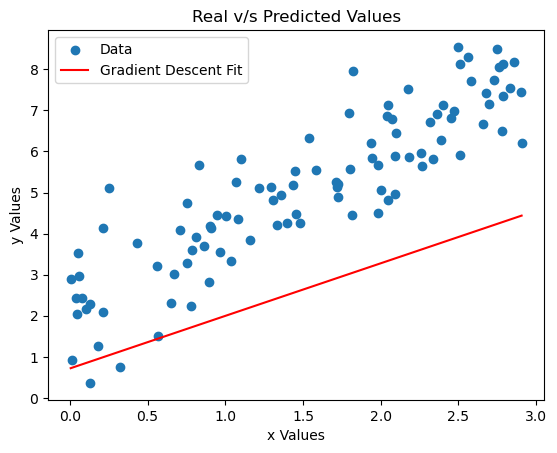

In [9]:
plt.scatter(X, y, label='Data') 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='Gradient Descent Fit')  # regression line

plt.xlabel('x Values')
plt.ylabel('y Values')
plt.title('Real v/s Predicted Values')
plt.legend(loc='upper left')
plt.show()
# wait, what happened? Check your learning rate.

## Question 5
(3 pts)

<font color = 'red'> 1. Can you find a better learning rate for your regression task?
    
2. What is the regression prediction equation (using coefficients) using LinearRegression()? Using the gradient descent algorithm (assuming you've found the right learning rate and epochs?) Are they the same?
    
3. Three main Gradient Descent methods are Batch, Stochastic, and Mini Batch. In a few sentences, explain the differences between them. (these become important concepts with say building a logistic regression neural network that is very large, perhaps a classifier for images of animals) </font>

[2.23671743] [1.58101374]


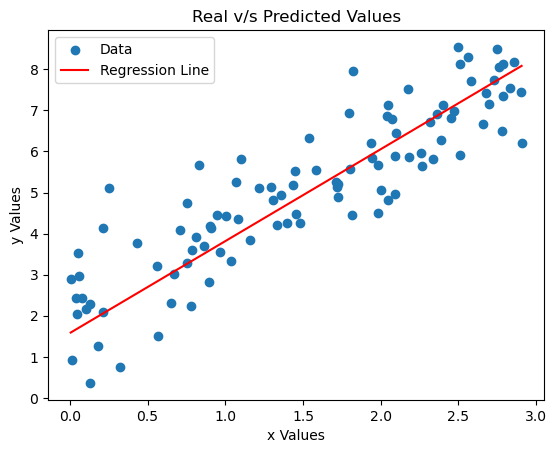

In [10]:
# 1. For the regression task, using a learning rate of 0.001 yields a much more accurate regression line as shown below

L = 0.001

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = (m*X) + b
    D_m = (-2/n) * sum(X * (y - Y_pred))
    D_b = (-2/n) * sum(y - Y_pred)
    m = m - (L*D_m)
    b = b - (L*D_b)
    
print (m,b)

plt.scatter(X, y, label='Data') 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='Regression Line')  # regression line

plt.xlabel('x Values')
plt.ylabel('y Values')
plt.title('Real v/s Predicted Values')
plt.legend(loc='upper left')
plt.show()

In [11]:
# 2. Using LinearRegression()

y_pred = (m*X)+b
regression = LinearRegression().fit(X, y_pred)
    
print("m:", regression.coef_)
print("b:", regression.intercept_)
print("These values are the same as the ones obtained by coding in the regression manually using L = 0.0001.")

m: [[2.23671743]]
b: [1.58101374]
These values are the same as the ones obtained by coding in the regression manually using L = 0.0001.


3. Difference between batch, stochastic, and mini-batch:

BGD (Batch gradient descent) is the standard method for performing gradient descent. By computing the negtaive gradient with respect to all the parameters, it converges towards the minimum of the loss function. However, this can become computationally expensive as the number of samples increase which is where SGD (stochastic gradient descent) steps in. In this method, the gradients are computed from only one object at a time, making it faster but also less likely to find the minimum and/or stay at it. To find a balance between computational compelxity and reduction of stochasticity, we introduce MGD (Mini-batch gradient descent). Using a select number of samples at each epoch, it computes the gradients to move towards the local minimum.

Reference: Chapter 5 of Viviana Acquaviva's Machine Learning for Physics and Astronomy

# Polynomial Regression
(Can be found in Chapter 4 of HOML)
We are now going to use time series data from last year about Covid cases across the world.
For this final section, we will use our 8 steps in ML

## Step 1. Big Picture  
For this task, we will be looking at positive Covid test rates all over the world, from Jan 2020- Aug 2020. Incidentally this is a very popular set used on Kaggle in inumerable ways. Our goals are as follows:  
1. Try to model a slice of our dataset using Polynomial Regression. Our metrics will include: Mean squared error (MSE) to assess training vs test sets, and finding the optimal order (degree) of the polynomial, and then trying to assess if we've overfit, or underfit, and possible remedies. (If, during the lab, you are wondering 'why are we doing it this way?' Know that, this is an actual job interview assessment in "the real world". And, of course if you would like to propose a 'better way' to attack the problem (what order, lowest MSE, or, another type of fit, that would be a great discussion topic as well).  

2. Read about the LinearRegression() and PolynomialRegression() classes in scikit learn, get a feel for how to use them. HOML is useful, as well as scikit-learn documentation.

Another important note: We will be using the PolynomialRegression() class to fit our data to a LinearRegression() model (Read HOML for a brief explanation). Because we are using LinearRegression() in scikit-learn, we will **not** be using Gradient Descent here! We rely on scikit-learn's LinearRegression() class which uses singular value decomposition in its calculation of ordinary least squares. (Extra credit: You can normalize as one of your parameters you are passing to the class, as always understanding the scikit-learn classes, what parameters you can set and pass, and how things work under the hood are always helpful to read up on)  

So, keep it simple, there's not too much coding or work that goes into this task. Good luck! Ask for hints in slack or to check if you are on the right track.

## Step 2. Get Data

In [12]:
import numpy.matlib as matlib
import pandas as pd

# load the time_series_covid_19_confirmed.csv using pandas in your lab3 folder. 
data=pd.read_csv('time_series_covid_19_confirmed.csv')

## 3. Explore Data


## Question 6
(5 pts)

Check the shape, and head, plot, visualize, and have a look at the data with whatever ways you think will help your task. Comment throughout on observations. Note: There are NaNs but you do NOT have to worry about them for this task.

In [13]:
# 1. Shape of data
print(data.shape)

(266, 225)


In [14]:
# 2. Head of data
print(data.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/20  8/21/20  8/22/20  \
0        0        0        0        0  ...    37856    37894    37953   
1        0        0        0        0  ...     7967     8119     8275   
2        0        0        0        0  ...    40258    40667    41068   
3        0        0        0        0  ...     1024     1045     1045   
4        0        0        0        0  ...     2044     2068     2134   

   8/23/20  8/24/20  8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  
0    37999    38054    38070    38113    38129   

[ 16903 513525   4620 165271  69414  32838 791070  92195]
['Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia']


Text(0.5, 1.0, 'Total COVID Cases in Australian Provinces')

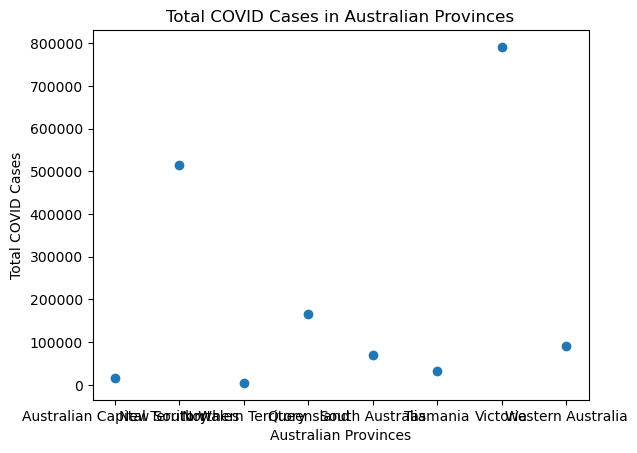

In [15]:
aussie_data = data.loc[data['Country/Region']=='Australia']
#print(aussie_data)

covid_cases = np.array(aussie_data.iloc[:,4:])
#print(covid_cases)

# Find total number of cases in each province
total_cases = np.sum(covid_cases, axis=1)
print(total_cases)

provs=np.array(aussie_data['Province/State'])
print(provs)

plt.scatter(provs, total_cases)
plt.xlabel('Australian Provinces')
plt.ylabel('Total COVID Cases')
plt.title("Total COVID Cases in Australian Provinces")

## 4. Prepare Data
This step is mostly done for you. But- I highly recommend tracing through this so you understand this common data manipulation. Notice Pandas is being used to examine the data, but we will transform data into different arrays and don't need to think about Pandas when we are analyzing.

In [16]:
# let's only use 50 rows and 100 columns, just to make this easier (and faster)
rows=50
cols=100
data_new=data.iloc[0:rows,4:cols+4]
print(data_new.shape)

(50, 100)


In [17]:
# Now we are going to convert the Tablular data to format {X,Y}, where X={Longitude, Latitude, Date}, Y={#infected}
#Finding the date indices
import matplotlib.pyplot as plt
data_row=data_new.sum(axis=0) # bb per day summing up positive cases into cols
days=range(0,data_row.shape[0])
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(days_mat.shape)

(50, 100)


In [18]:
#Lets create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date, Y=#affected
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1)))

In [19]:
print(np.shape(X))
#Data Preparation is Done!

(5000, 3)


(5000, 3)


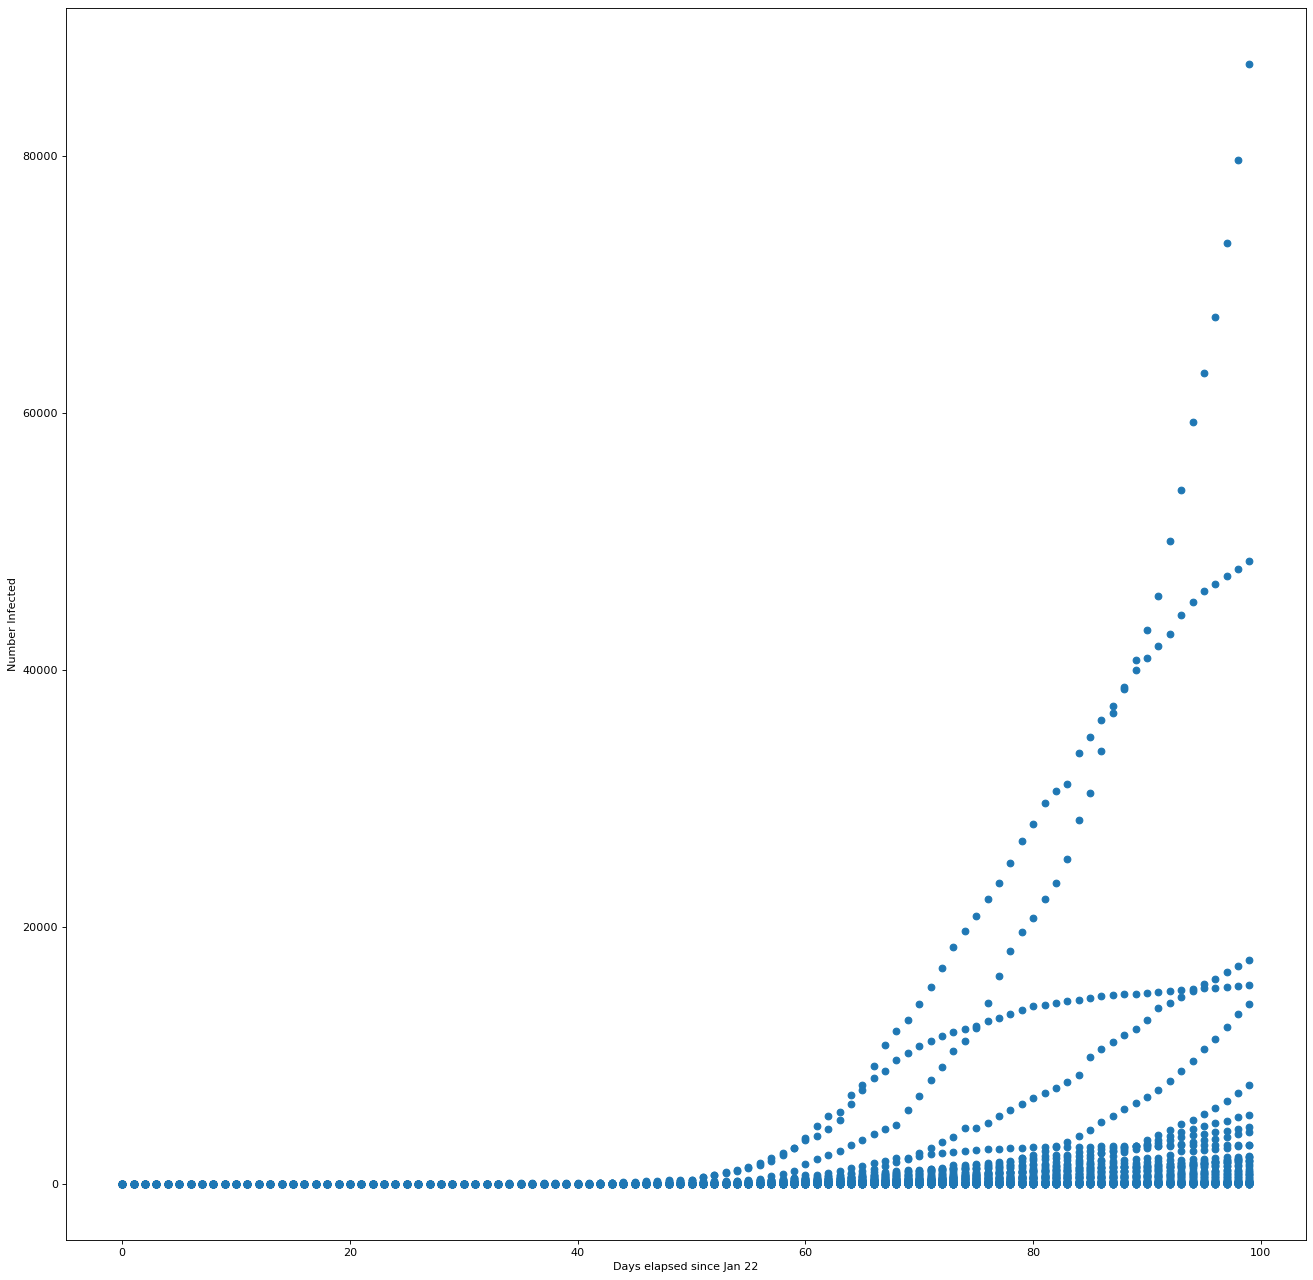

In [20]:
# Let's plot the data in this new format
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

## 5. Select Model and Train-
If you are wondering why we've gone back to just test and train, it is merely to mimic the actual job interview assignment. (In general, train, test, val is better, this is faster)

## Question 7
(5 pts)


In [21]:
#Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
#Split data to train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
# If you are tinkering, you'd use X_train, etc to pass as parameters and rename new sets to keep track.

In [22]:
# What do you think about this data? How would you fit a regression model?
# We are going to try Polynomial Regression (in Chap. 4 of HOML)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3) # try out degree 3
#Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
#Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (1500, 20)
Linear Regression Coefficients are= [[ 0.00000000e+00  1.49472285e+00 -1.77011169e+01 -7.44377620e+00
  -2.62371164e+00 -1.66783679e-01 -1.32523607e+00  1.32613637e-01
   1.60019698e-01 -5.80740444e-01  4.74622499e-02  8.72080430e-03
   4.50831003e-02 -2.04127549e-03  1.26028661e-02  2.75122310e-03
   2.97102909e-04 -9.33173379e-04 -3.45730697e-03  9.73845530e-03]]
constant coefficient= [515.00766133]


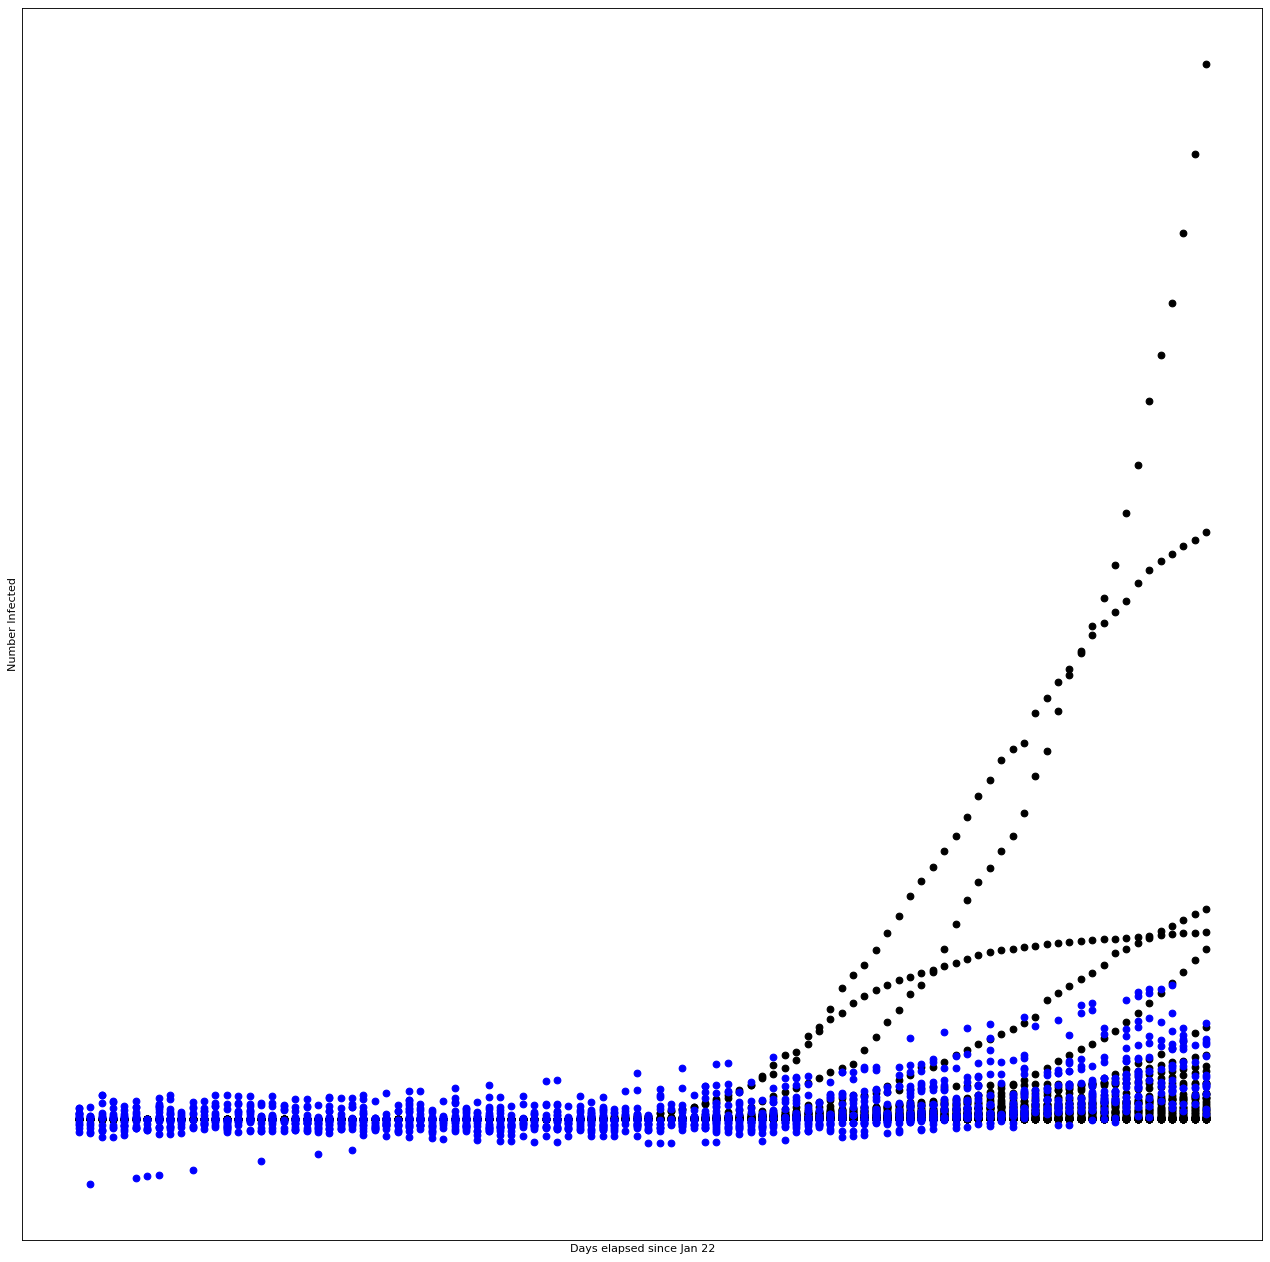

In [23]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
#next plot predictions
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error as mse
mse3 = mse(y_pred, y_test)

          3          2
0.008161 x - 0.3748 x - 0.6255 x + 53.08


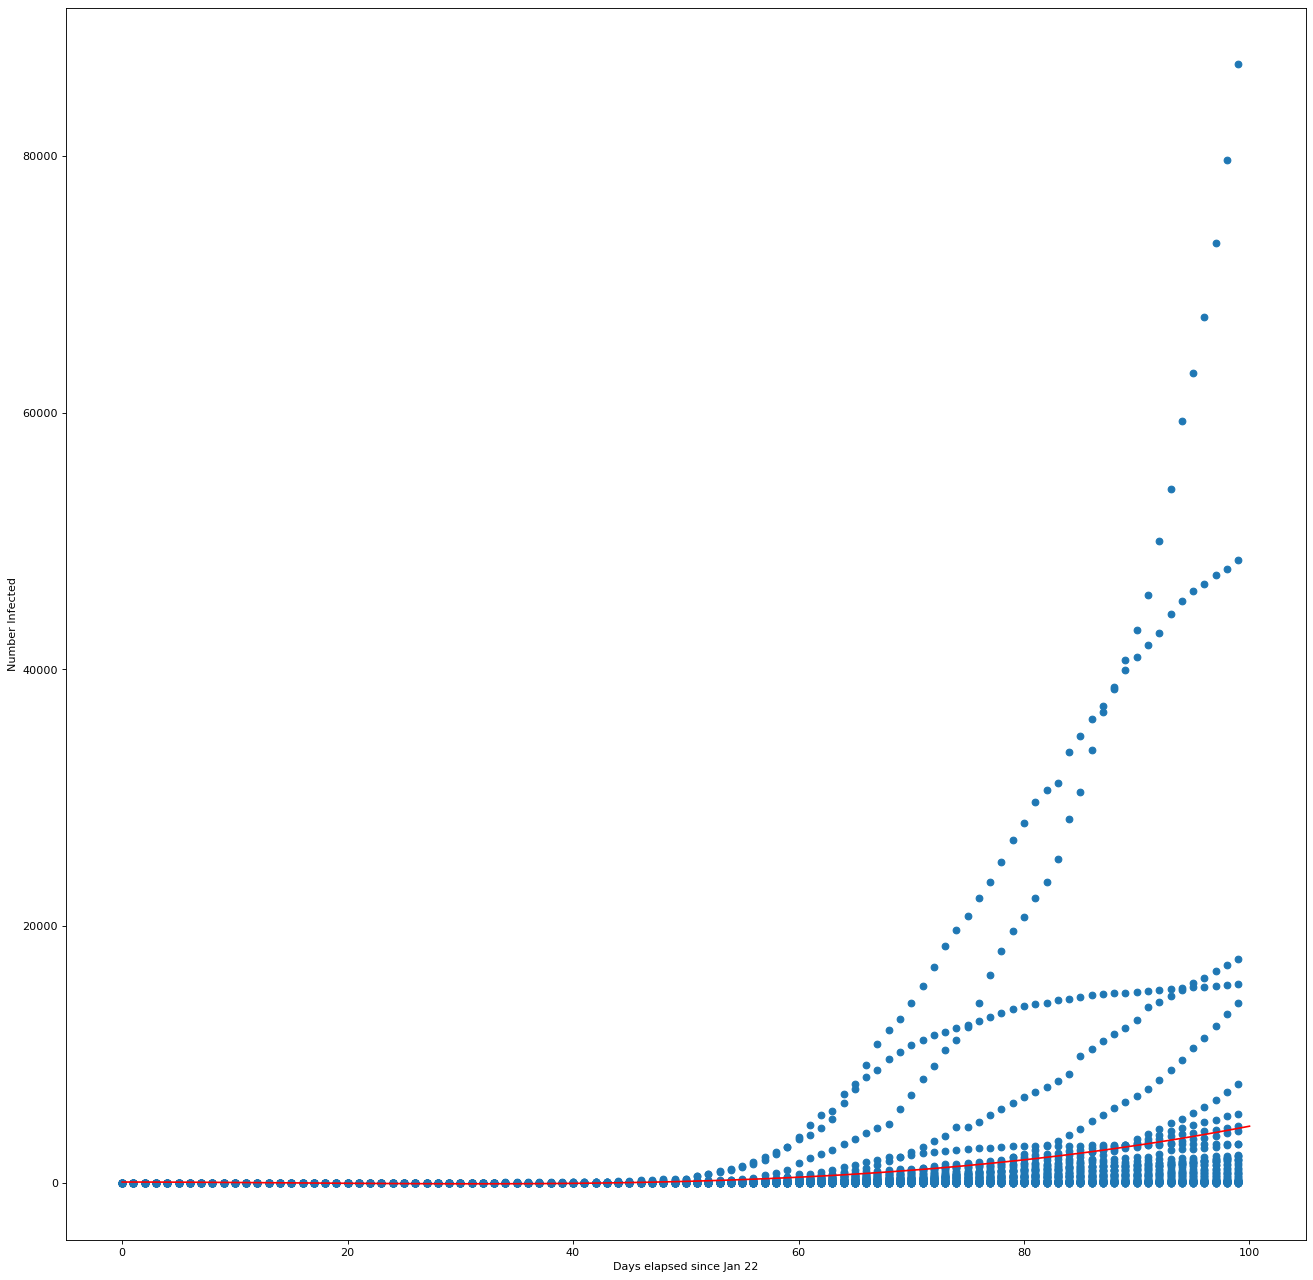

In [25]:
# you can also use numpy 
# 1D polynomial regression
model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))
print(model)
model_x = np.linspace(0, 100, 100)
plt.figure(figsize=(20, 20), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.plot(model_x, model(model_x),'r')

plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
plt.show()


# 6.  Fine Tune Model

## Question 8
(5 pts)

So, let's say we've decided to use polynomial regression for this task. What order of polynomial will give us the best model? How can we check and make sure we did not overfit or underfit? Here order(degree) is sort of a hyperparameter (but not exactly).
<font color = 'red'> 1. Use PolynomialFeatures from above and create an algorithm below that just checks one degree, for example degree = 8. </font>


In [26]:
# let's try an exponential fit of deg 8
poly = PolynomialFeatures(degree=8)
#Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)

# print the new shape of the test data
print("New shape of test data =",np.shape(X_test))

clf2 = LinearRegression()
# Fit the model on train data only
clf2.fit(X_train, y_train)
#print("Linear Regression Coefficients are=",clf2.coef_)
#print("constant coefficient=",clf2.intercept_)

# print out mse (mean squared error) How does it compare to the polynomial fit of order 3?
y_pred = clf2.predict(X_test)
print("MSE for polynomial fit of order 8:", mse(y_test, y_pred))
print("MSE for polynomial fit of order 3:", mse3)
print("MSE for polynomial fit of order 8 is lower than that of order 3 by:", 100*(1-(mse(y_test, y_pred))/mse3), "%.")

New shape of test data = (1500, 165)
MSE for polynomial fit of order 8: 1647352.0698174376
MSE for polynomial fit of order 3: 20560548.002745155
MSE for polynomial fit of order 8 is lower than that of order 3 by: 91.98780076485563 %.


In [27]:
# Build an algorithm that finds us the best order for the training set (lowest MSE), then the test set, using the lowest mse
# Hint- use a for loop of degrees. (be aware as the orders get higher this might really slow down, you don't have
# to let it run for hours though! Not for this assignment...) append MSE scores for train and test. (you'll want these
# for plotting.) return the best order for both train and test.
# Hint 2: use from sklearn.model_selection import cross_val_score and 
# have a line in your code like this: scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5)
# you could also use scoring =‘neg_mean_squared_error’ (from metrics.mean_squared_error) but you don't have to,
# scoring will return the 'highest score'- which will pair with the lowest MSE for a particular order.
# which is why MSE is often made negative.

from sklearn.model_selection import cross_val_score
import statistics

def polyregr(order, X_training, y_training, X_testing, y_testing):

    # Declare empty array to hold values we want to return
    scores_MSEs = []
    
    # Exponential fit of deg i
    poly = PolynomialFeatures(degree=order)
 
    #Transform both the train and test data
    X_train = poly.fit_transform(X_training)
    X_test = poly.fit_transform(X_testing)

    clf_plz = LinearRegression()
    
    # Fit the model on train data
    clf_plz.fit(X_train, y_train)
    ytrain_pred = clf_plz.predict(X_train)

    # Get MSE
    scores_MSEs.append(mse(y_train, ytrain_pred))

    # Get MSE score
    train_MSE_score = cross_val_score(clf_plz, X_train, y_train, cv=5)
    #print("Before:", train_MSE_score)
    train_MSE_score = statistics.median(train_MSE_score)
    #print("After:", train_MSE_score)
    scores_MSEs.append(train_MSE_score)

    # Fit the model on test data
    y_pred = clf_plz.predict(X_test)

    # Get MSE
    scores_MSEs.append(mse(y_test, y_pred))

    # Get MSE score
    test_MSE_score = cross_val_score(clf_plz, X_test, y_test, cv=5)
    #print("Before:", test_MSE_score)
    test_MSE_score = statistics.median(test_MSE_score)
    #print("After:", test_MSE_score)
    scores_MSEs.append(test_MSE_score)

    # Return array of form: [training MSE, training score, test MSE, test score]
    return scores_MSEs

# This number was chosen after observing when the MSE scores began to decrease
# This was plotted using the last 2 lines in the cell if you wanna check for yourself
num_orders=20

train_orders = np.arange(num_orders)

train_MSEs = []
train_MSE_scores = []

test_MSEs = []
test_MSE_scores = []

for order in range(num_orders):
    #print("Order:", order)

    # Call polyregr function
    scores_and_MSEs = polyregr(order, X_train_1, y_train, X_test_1, y_test)
    #print(scores_and_MSEs)
    train_MSEs.append(scores_and_MSEs[0])
    train_MSE_scores.append(scores_and_MSEs[1])
    test_MSEs.append(scores_and_MSEs[2])
    test_MSE_scores.append(scores_and_MSEs[3])

min_train_MSE = np.min(train_MSEs)
best_train_order = np.argmin(train_MSEs)
print("The best order for this training set is", best_train_order, "with the minimum MSE of:", min_train_MSE)

min_test_MSE = np.min(test_MSEs)
best_test_order = np.argmin(test_MSEs)
print("The best order for this test set is", best_test_order, "with the minimum MSE of:", min_test_MSE)

# Will return best orders and minimum MSEs as an array in the form:
# [min training MSE, best training order, min test MSE, best test order]
best_orders_min_MSE = [min_train_MSE, best_train_order, min_test_MSE, best_test_order]
print(best_orders_min_MSE)

# Uncomment these 2 lines of you want to see how I decided the number of orders
#plt.plot(train_orders, train_MSE_scores)
#plt.plot(train_orders, test_MSE_scores)

The best order for this training set is 15 with the minimum MSE of: 11606.46004538434
The best order for this test set is 15 with the minimum MSE of: 28659.827974128297
[11606.46004538434, 15, 28659.827974128297, 15]


<font color ='red'> 1. What was the best order (and lowest MSE) for the test set?  
    2. What was the best order  (and lowest MSE) for the training set?
    3. plot training and test errors (MSEs) as a function of order.

1. The best order for the test set was 15 corresponding to the lowest MSE which was 11606.46.
2. The best order for the training set was 15 corresponding to the lowest MSE which was 28659.83.

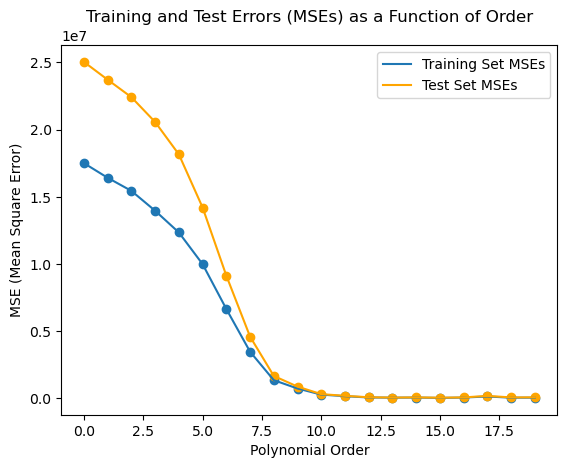

In [28]:
# 3. Training and test errors (MSEs) as a function of order

plt.scatter(train_orders, train_MSEs)
plt.plot(train_orders, train_MSEs, label='Training Set MSEs')

plt.scatter(train_orders, test_MSEs, color='orange')
plt.plot(train_orders, test_MSEs, color='orange', label='Test Set MSEs')

plt.xlabel('Polynomial Order')
plt.ylabel('MSE (Mean Square Error)')
plt.title('Training and Test Errors (MSEs) as a Function of Order')
plt.legend(loc='upper right')
plt.show()

# 7. Present Solution

Hopefully you found in both train and test low MSEs that began to rise again, so you think these might be appropriate orders for your polynomial fit. Cross-validation helps us to find the best fit. Another way is to look at the learning curves of train vs. test (or validation set).
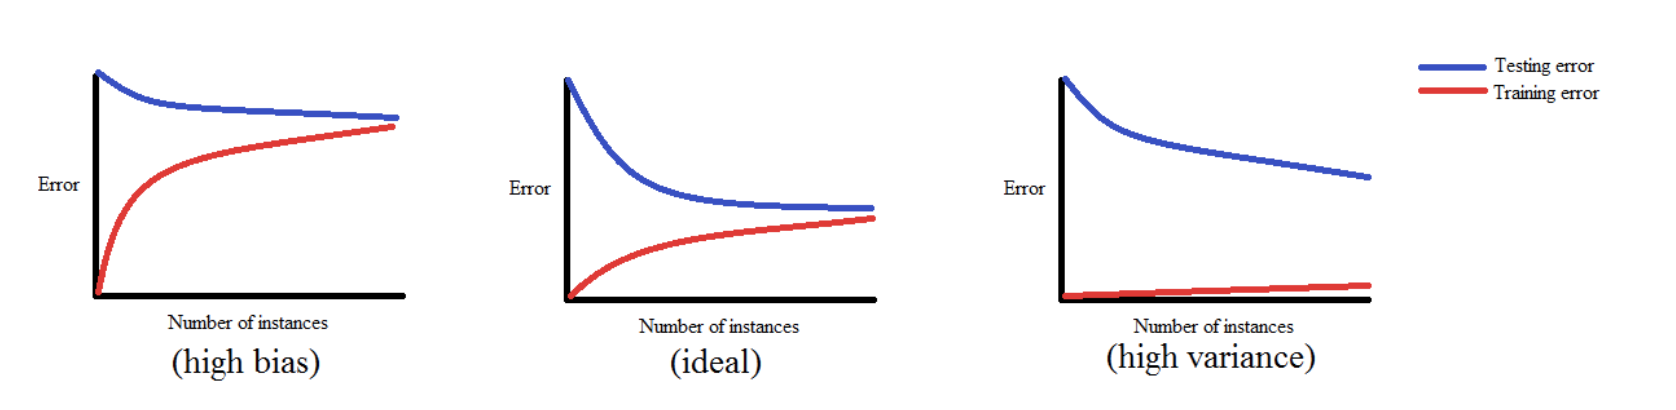

High bias is underfitting- notice the first image on the left the error goes up and stays up. For the image on the right with high variance, the model is overfitting. Notice the error is lower on the training data, but there is a gap between the curves, meaning it performs better on the training data than on the validation data.

## Question 9
(3 pts)

For your final task, using your training set only,  and 'from sklearn.model_selection import learning_curve' you will be making 3 plots. First, choose orders where you think the model is underfitting, just right, and overfitting.
Next, you'll be using learning_curves (from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) 
A learning curve shows how error changes as the training set size increases. It turns out learning_curves does the work for us of separating out a validation set using the cv parameter. So for ease, just use your training set.

<font color='red'> 1. Plot a learning curve for an underfitting polynomial fit of a particular order.  
    2. Plot a learning curve for the best order polynomial fit you found for your training set.  
    3. Plot a learning curve of an order higher than your best fit to show overfitting.

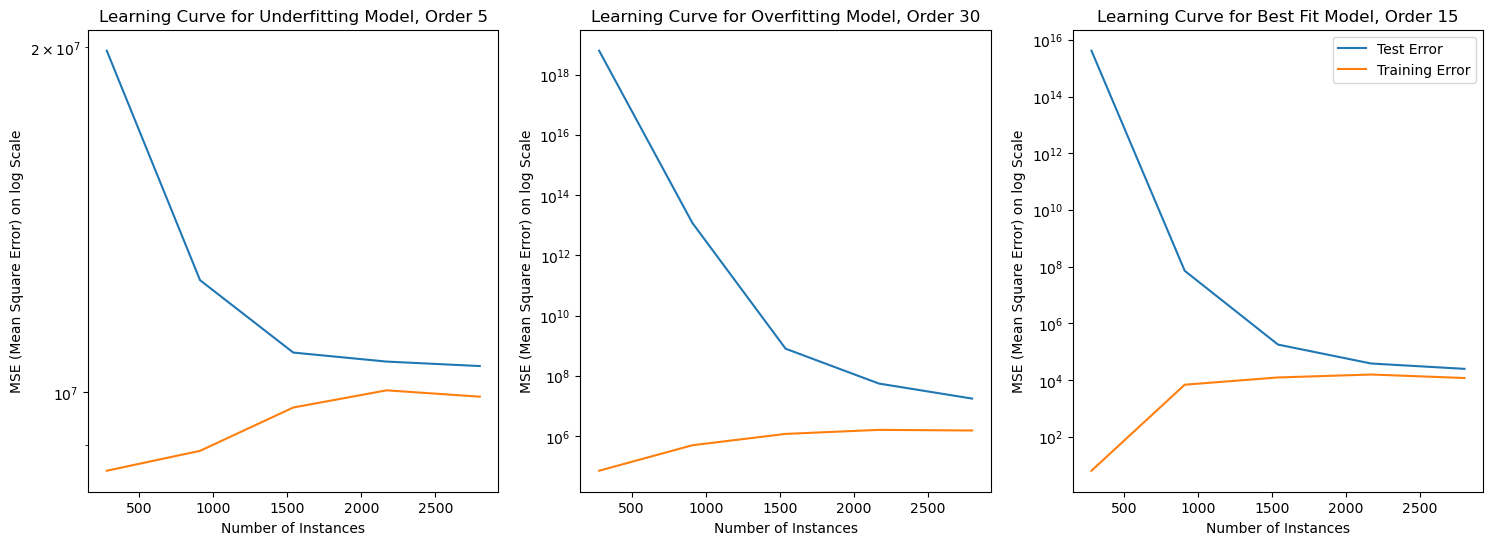

In [29]:
from sklearn.model_selection import learning_curve

# Goldilocks Moment
underfit_order = 5
overfit_order = 30
just_right = 15
orders_fit = [underfit_order, overfit_order, just_right]

labels = {5:'Underfitting', 30:'Overfitting', 15:'Best Fit'}
degrees = [5, 30, 15]
figures, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,6), dpi=100)

for i in range(len(orders_fit)):
    train_sizes, train_scores, test_scores = model_selection.learning_curve(
        estimator = LinearRegression(),
        X = PolynomialFeatures(degree=orders_fit[i]).fit_transform(X_train_1),
        y = y_train,
        cv = 5,
        scoring = 'neg_mean_squared_error'
    )

    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_mean = np.mean(train_scores, axis=1)

    axs[i].semilogy(train_sizes, -1.*test_scores_mean, label='Test Error')
    axs[i].semilogy(train_sizes, -1.*train_scores_mean, label='Training Error')

    axs[i].set_xlabel('Number of Instances')
    axs[i].set_ylabel('MSE (Mean Square Error) on log Scale')
    axs[i].set_title('Learning Curve for {} Model, Order {}'.format(labels[degrees[i]], degrees[i]))

plt.legend(loc='upper right')
plt.show()

# 8. Launch, Monitor and Maintain
Nothing to do at phase 8-- but think about what you would do if you were updating your Covid model with new data. How often would you retrain? What if different periods of time looked like different polynomials or looked linear?

## Great Job! 

I would retrain my model if data from 2021 onwards was added to understand the overall trend of COVID cases in later years. Additionally, if there was data from new countries, I would retrain my model to account for the general trend in those places to see if there is any difference that can be used to improve my model!